In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's read dataset from the path of '0_csv/salary.csv' 

In [12]:
df = pd.read_csv('0_csv/salary.csv')

Let’s start by examining our dataset. We’ll check for null values, explore the data types of the columns, and determine the number of rows and columns in the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


/Users/mek/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mek/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


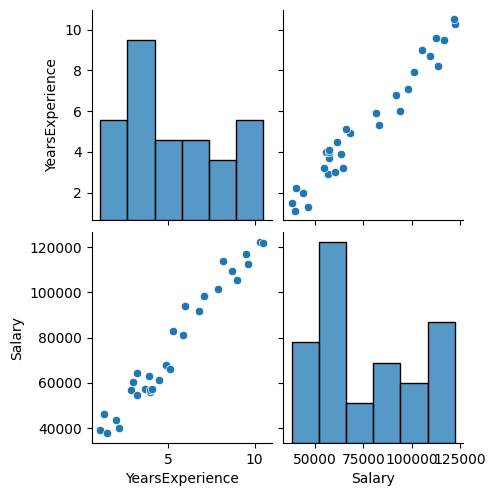

In [14]:
import seaborn as sns
sns.pairplot(df)

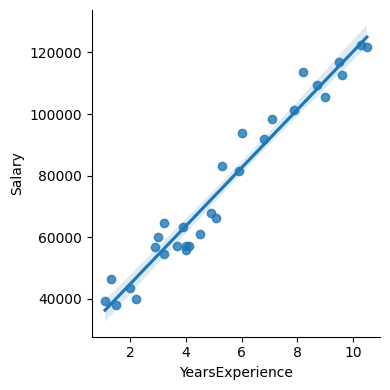

In [15]:
sns.lmplot(x='YearsExperience',y='Salary', data=df, height=4)

Lets represent X (the input features) and y the output to be predicted.

In [16]:
target_column = 'Salary'
X = df.drop(columns=target_column)
y = df[target_column]

In [24]:
print(X.shape, y.shape)

(30, 1) (30,)


## Split data

Using model_selection.train_test_split from sklearn, we split the data into training (%80) and testing (%20)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a regression model 
### (e.g., Linear Regression).

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Predicting Test Data

In [19]:
y_predict = lr.predict(X_test)

### Evaluating the Model

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_predict)
print('R2 score:', r2)

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print('RMSE:', rmse)

R2 score: 0.9024461774180497
RMSE: 7059.04362190151


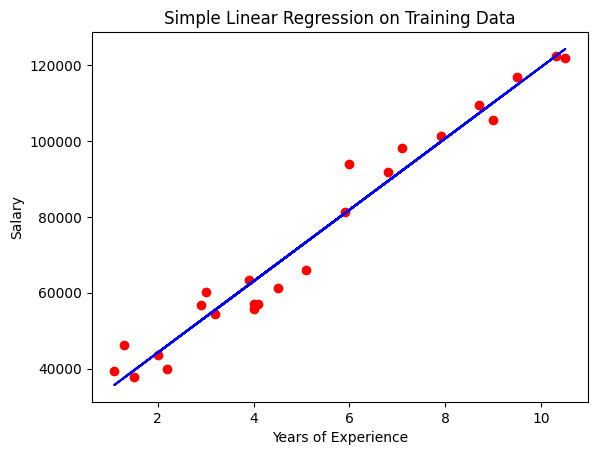

In [25]:
# Visualising the Training set results
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,lr.predict(X_train),color='blue')
plt.title("Simple Linear Regression on Training Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

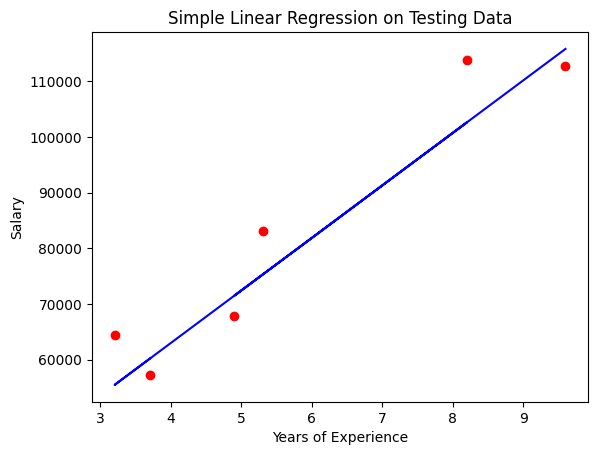

In [26]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_predict,color='blue')

plt.title("Simple Linear Regression on Testing Data")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [27]:
y_hat = lr.predict(X_train)

r2 = r2_score(y_train, y_hat)
print('R2 score:', r2)

R2 score: 0.9645401573418146


#### The R2 score for the training data is 0.9645, while for the test data, it is 0.9024. These results indicate that the model is not overfitting.
#### The difference in R2 scores is likely due to the size of the dataset, which can affect the model's performance on the test data compared to the training data.